In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/home/kumar/Downloads/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.rename(columns={'v1': 'label', 'v2': 'text'}, inplace = True)
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data['numClass'] = data['label'].map({'ham':0,'spam':1})
data.head()

,label,text,numClass
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
data['count'] = 0

for i in np.arange(len(data.text)):
    data.loc[i,'count'] = len(data.loc[i,'text'])
    
data.head()

,label,text,numClass,count
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [7]:
ham = data[data.numClass == 0]
spam = data[data.numClass == 1]

In [9]:
import nltk, os
'''
if True:
    os.system('python -m nltk.downloader')
'''
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
stopset = set(stopwords.words("english"))
print(stopset)

{'they', 'him', 'down', "won't", 'your', 'from', 'these', "shouldn't", 'them', "should've", 'again', 'she', 'there', "it's", "aren't", 'which', 'that', 'through', 'above', 'be', 'you', 'yourselves', 'weren', 'll', 'or', "you're", 'of', 'most', 'my', 'up', "weren't", 'haven', 'shan', 'into', 'was', 'only', 'until', 'this', 'd', 'in', 'few', 'didn', 'wasn', 'i', 'each', 'mustn', 'with', 'if', 'aren', 'their', 'am', 've', 'does', 'being', 'those', "mustn't", 'myself', 'himself', 'theirs', 'before', 'who', 'can', 'hadn', 'herself', 'because', 'while', "couldn't", 'very', 'mightn', 'more', 'having', 'than', 'should', 'y', 'hasn', 'same', 'don', 'o', 'some', 'themselves', 'where', 'own', 'what', 'no', 'ain', "you've", 'will', 'wouldn', 're', "hasn't", "doesn't", 'by', 'our', 'after', 'below', 'doesn', 'both', 'm', 'itself', "needn't", "shan't", "you'd", "hadn't", "haven't", 'its', 'at', 'have', 'is', 'on', 'then', 'yourself', 'his', 'needn', 'isn', "wouldn't", 'are', 'and', 'how', 'such', 't

In [16]:
vectorizer = TfidfVectorizer(stop_words = stopset, binary = True)
print(vectorizer[0])

AttributeError: 'TfidfVectorizer' object has no attribute 'head'

In [12]:
# Extract feature column 'Text'
X = vectorizer.fit_transform(data.text)
# Extract target column 'Class'
y = data.numClass

In [19]:
print(X[1])

  (0, 5427)	0.27211951321382544
  (0, 4448)	0.4082988561907181
  (0, 4255)	0.5236458071582338
  (0, 8264)	0.4316010362639011
  (0, 5454)	0.5465881710238072


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=42)

In [21]:
# Import the models from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import KFold

objects = ('Multi-NB', 'DTs', 'AdaBoost', 'KNN', 'RF')

In [22]:
# function to train classifier
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

# function to predict features 
def predict_labels(clf, features):
    return(clf.predict(features))

In [23]:
# Initialize the models
A = MultinomialNB(alpha=1.0,fit_prior=True)
B = DecisionTreeClassifier(random_state=42)
C = AdaBoostClassifier(n_estimators=100) 
D = KNeighborsClassifier(n_neighbors=1)
E = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [24]:
# loop to call function for each model
clf = [A,B,C,D,E]
pred_val = [0,0,0,0,0]

for a in range(0,5):
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val[a] = f1_score(y_test, y_pred) 
    print(pred_val[a])

0.8847583643122676
0.888135593220339
0.8953068592057762
0.7704918032786886
0.8814814814814814


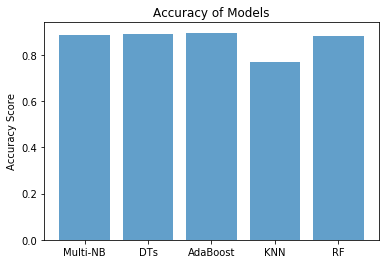

In [25]:
# ploating data for F1 Score
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()